PREPROCECING

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#pemanggilan data
data = pd.read_csv("Data Cancer.csv")

In [21]:
data.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


Dataset yang Anda unggah berisi data klinis pasien yang berkaitan dengan diagnosis kanker. Setiap baris mewakili satu pasien, dan berikut adalah penjelasan dari masing-masing kolom/variabel yang ada di dataset:

Penjelasan Variabel dalam Dataset:

Age: Usia pasien (dalam tahun).

Gender: Jenis kelamin pasien (1 = Laki-laki, 0 = Perempuan).

BMI: Indeks massa tubuh pasien (Body Mass Index).

Smoking: Status merokok (1 = Merokok, 0 = Tidak merokok).

GeneticRisk: Tingkat risiko genetik terhadap kanker (nilai numerik, kemungkinan kategori 0 = rendah, 1 = sedang, 2 = tinggi).

PhysicalActivity: Tingkat aktivitas fisik pasien (semakin tinggi nilainya, semakin aktif).

AlcoholIntake: Tingkat konsumsi alkohol pasien.

CancerHistory: Riwayat kanker sebelumnya (1 = Ada, 0 = Tidak ada).

Diagnosis: Label target yang menunjukkan apakah pasien terdiagnosis kanker (1 = Positif kanker, 0 = Negatif kanker).

Kegunaan Dataset:

Dataset ini dapat digunakan untuk: Prediksi diagnosis kanker berdasarkan faktor-faktor risiko seperti gaya hidup, genetika, dan riwayat penyakit.

Analisis kontribusi faktor-faktor seperti merokok, konsumsi alkohol, dan aktivitas fisik terhadap risiko kanker.

Pembuatan model machine learning untuk mendeteksi kanker sejak dini.

In [22]:
data.tail(5)

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1
1499,67,1,23.663104,0,0,2.525860,2.856600,1,0


In [23]:
#melihat statistika deskriptif
data.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 9 kolom. Kolom pada dataset tersebut memiliki dua tipe data, yaitu: integer dan float. Dengan demikian tidak perlu dilakukan Encoding Data. Jumlah maksimal baris untuk setiap kolom sebanyak: 1500 baris. Seluruh kolom sudah memiliki jumlah baris = 1500, maka tidak perlu dilakukan penanganan missing value.

*CEK OUTLIER*

Cek Outlier Outlier dapat dideteksi menggunakan beberapa metode:

1. Boxplot → Visualisasi distribusi dan outlier
2. Interquartile Range (IQR) → Mengidentifikasi outlier berdasarkan distribusi kuartil

1. Boxplot

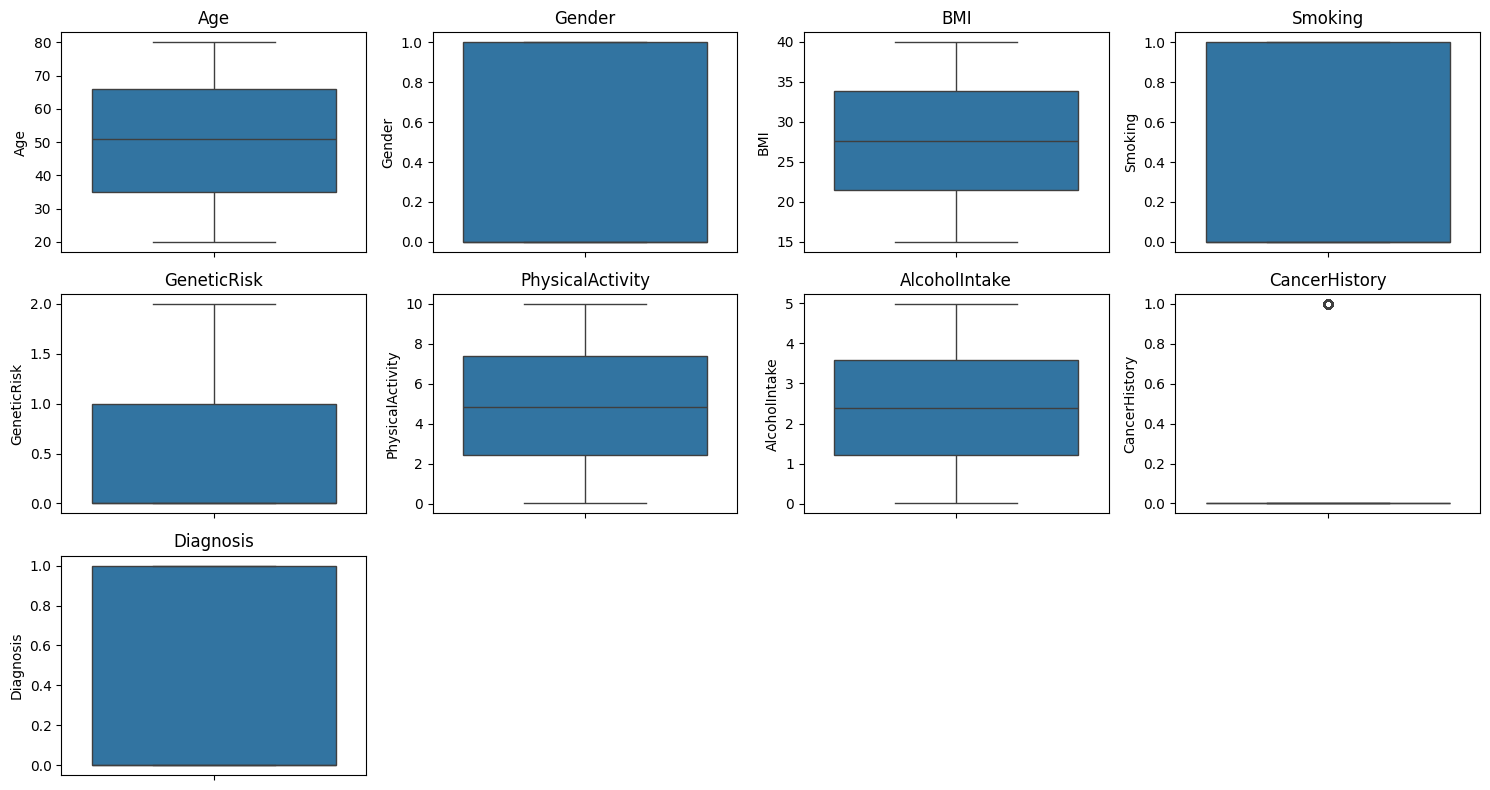

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity','AlcoholIntake','CancerHistory', 'Diagnosis']

#Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate (num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [26]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile (0.25) #Kuartil 1
    Q3 = data[column].quantile (0.75) #Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

Age: 0 outliers
Gender: 0 outliers
BMI: 0 outliers
Smoking: 0 outliers
GeneticRisk: 0 outliers
PhysicalActivity: 0 outliers
AlcoholIntake: 0 outliers
CancerHistory: 216 outliers
Diagnosis: 0 outliers


Berdasarkan hasil tersebut, ditemukan outlier pada kolom "CancerHistory" sebanyak 216 outliers. Sehingga diperlukan penanganan outliers.Penanganan outlier pada kolom "BMI" digunakan Winsorizing (Mengganti Outlier dengan Batas IQR)..

In [61]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

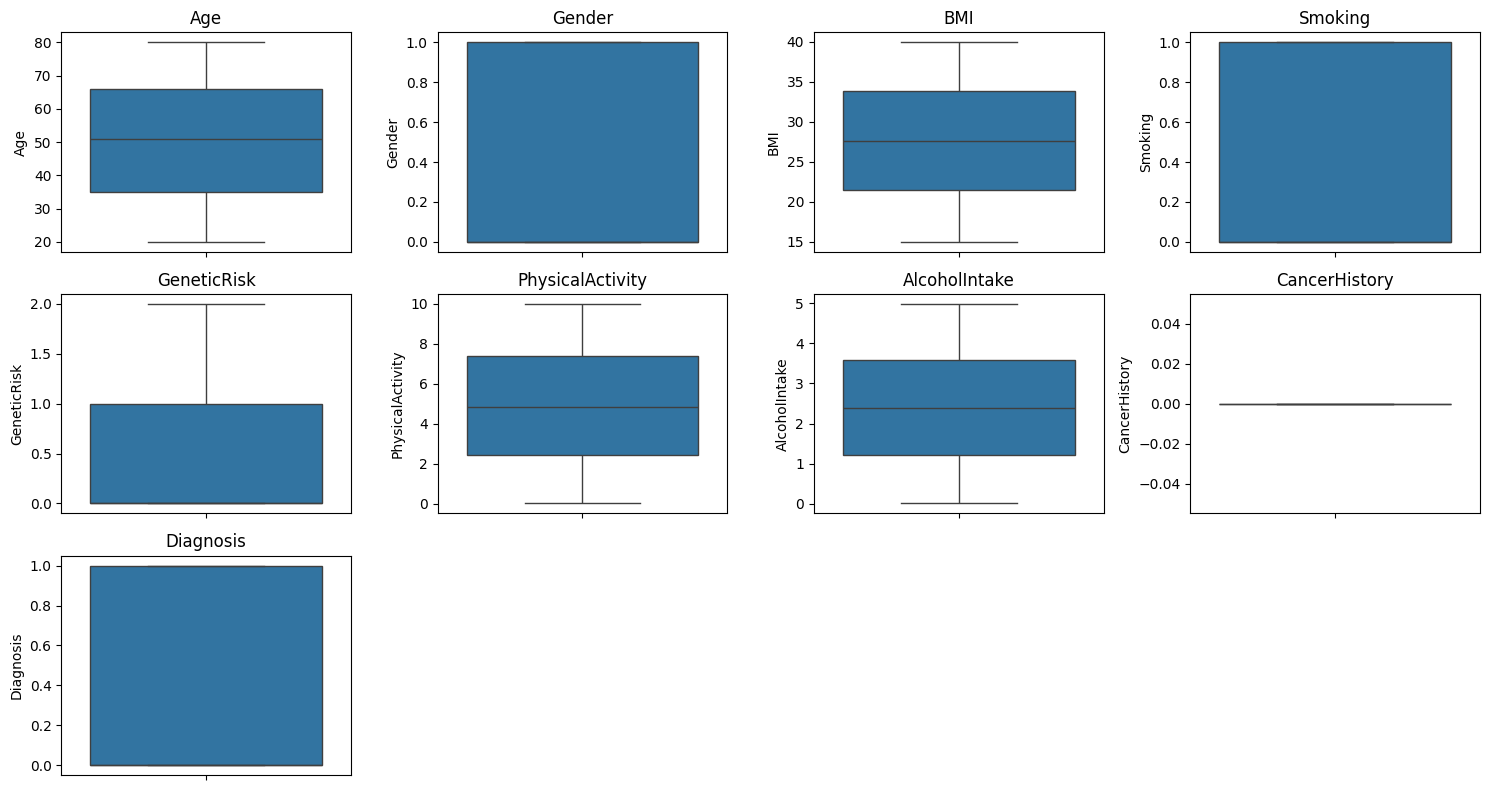

In [62]:
#cek boxplot lagi

num_cols = ['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity','AlcoholIntake','CancerHistory', 'Diagnosis']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [63]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

Age: 0 outliers
Gender: 0 outliers
BMI: 0 outliers
Smoking: 0 outliers
GeneticRisk: 0 outliers
PhysicalActivity: 0 outliers
AlcoholIntake: 0 outliers
CancerHistory: 0 outliers
Diagnosis: 0 outliers


Berdasarkan Output tersebut, sudah tidak ditemukan ouliers.

**K-NEAREST NEIGHBORS**

**Splitting the dataset into the training set and test set**

Splitting dataset merupakan langkah penting dalam proses pembelajaran mesin, yaitu dengan membagi dataset menjadi dua bagian: data training dan data testing. Data training digunakan untuk melatih model, di mana model akan mempelajari pola dan hubungan antara fitur-fitur (variabel independen) dan label atau target (variabel dependen) dari dataset. Selama proses pelatihan ini, model akan menyesuaikan parameter-parameter internalnya berdasarkan pola yang ditemukan agar dapat melakukan prediksi yang akurat terhadap data yang belum pernah dilihat sebelumnya.

Sebaliknya, data testing digunakan untuk mengevaluasi kinerja model setelah proses pelatihan selesai. Data ini tidak dilibatkan dalam pelatihan, sehingga dapat digunakan untuk mengukur sejauh mana model mampu menggeneralisasi pengetahuan yang telah dipelajari dari data training. Evaluasi ini penting untuk memastikan bahwa model tidak hanya menghafal data latih (overfitting), tetapi juga dapat mengenali pola umum yang berlaku pada data baru.

In [27]:
from sklearn.model_selection import train_test_split

X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1500
Total # of sample in train dataset: 1200
Total # of sample in test dataset: 300


In [29]:
print(X_train)

      Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
382    44       0  29.499595        0            0          7.214492   
538    61       0  17.636842        0            1          4.707010   
1493   59       1  39.266914        0            0          0.612167   
1112   44       1  26.807045        0            0          7.298891   
324    60       0  27.646317        0            0          9.355230   
...   ...     ...        ...      ...          ...               ...   
1130   41       1  17.787805        0            1          2.105285   
1294   24       1  37.960661        1            0          6.938633   
860    58       0  39.700899        0            0          8.514892   
1459   23       0  15.303919        0            0          3.269421   
1126   37       1  37.255375        1            2          0.968187   

      AlcoholIntake  CancerHistory  
382        4.109007              0  
538        4.753032              0  
1493       1.581462     

In [30]:
print(y_train)

382     0
538     0
1493    1
1112    0
324     0
       ..
1130    0
1294    0
860     0
1459    0
1126    1
Name: Diagnosis, Length: 1200, dtype: int64


In [31]:
print(X_test)

      Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
1116   46       1  30.193803        0            1          7.111218   
1368   49       1  33.547408        0            2          3.047609   
422    73       0  15.604794        0            0          6.579499   
413    41       0  25.247622        0            0          6.860912   
451    60       0  22.054677        1            0          7.804711   
...   ...     ...        ...      ...          ...               ...   
983    54       1  35.711732        0            0          2.842883   
799    37       1  24.048000        0            0          4.488514   
1265   50       1  19.067494        1            0          3.625832   
1150   41       0  34.349784        0            2          9.324440   
824    27       0  32.312321        0            0          6.200013   

      AlcoholIntake  CancerHistory  
1116       2.770849              1  
1368       2.570403              0  
422        4.913262     

In [32]:
print(y_test)

1116    1
1368    1
422     0
413     0
451     0
       ..
983     1
799     0
1265    0
1150    0
824     0
Name: Diagnosis, Length: 300, dtype: int64


**Feature Scaling**

Transformasi data dan Normalisasi data perlu dilakukan agar data dapat digunakan dalam algoritma KNN maupun Naive Bayes

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
print(X_train)

[[-0.35750835 -0.98675438  0.28128291 ...  0.80076495  1.18004581
  -0.40626167]
 [ 0.59847151 -0.98675438 -1.36900898 ... -0.06802927  1.63576969
  -0.40626167]
 [ 0.48600329  1.01342342  1.6400677  ... -1.48681391 -0.60849289
  -0.40626167]
 ...
 [ 0.42976918 -0.98675438  1.70044178 ...  1.25132867  0.07588352
  -0.40626167]
 [-1.53842465 -0.98675438 -1.6935546  ... -0.56612626  0.31826636
  -0.40626167]
 [-0.75114712  1.01342342  1.36023164 ... -1.36345956 -1.51502041
  -0.40626167]]


In [35]:
print(X_test.dtype)

float64


Training the K-NN model on the Training set

In [36]:
from math import sqrt
class KNN():
  def __init__(self,k):
    self.k=k
    print(self.k)
  def fit(self,X_train,y_train):
    self.x_train=X_train
    self.y_train=y_train
  def calculate_euclidean(self,sample1,sample2):
    distance=0.0
    for i in range(len(sample1)):
      distance+=(sample1[i]-sample2[i])**2 #Euclidean Distance = sqrt(sum i to N (x1_i-x2_i)^2)
    return sqrt(distance)
  def nearest_neighbors(self,test_sample):
    distances=[] #calculate distances from a test sample to every sample in a training set
    for i in range(len(self.x_train)):
      distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
    distances.sort(key=lambda x:x[1]) #sort in ascending order, based on a distance value
    neighbors=[]
    for i in range(self.k): #get fist k samples
      neighbors.append(distances[i][0])
    return neighbors
  def predict(self,test_set):
    predictions=[]
    for test_sample in test_set:
      neigbors=self.nearest_neighbors(test_sample)
      labels=[sample for sample in neighbors]
      prediction=max(labels,key=labels.count)
      predictions.append(prediction)
    return predictions

In [37]:
model=KNN(5)
model.fit(X_train,y_train)

5


In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) #The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
model = []
model.append(('KNN', KNeighborsClassifier()))

Prediksi KNN berdasarkan model yang dibangun

Modelling dengan KNN

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#definisikan nilai K dan buat objek KNN regressor
k = 3
knn = KNeighborsRegressor(n_neighbors=k)

#fitkan model KNN ke data train
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [41]:
# Lakukan prediksi pada data train dan dataset
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [42]:
#Hitung MSE untuk data train dan data test
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

In [43]:
print("MSE data train:", mse_train)
print("MSE data test:", mse_test)

MSE data train: 0.05314814814814815
MSE data test: 0.10592592592592592


**Hasil Prediksi berdasarkan perhitungan Mean Squared Error**

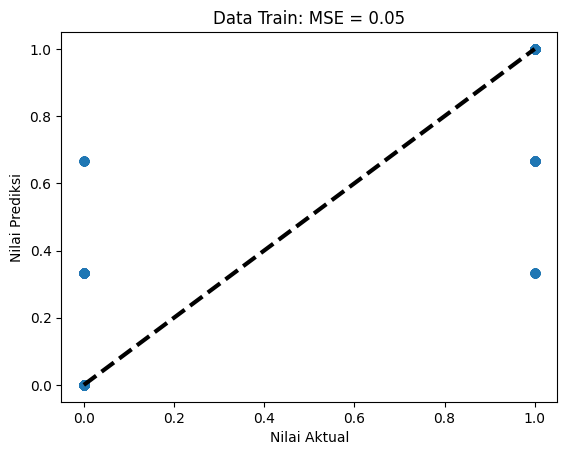

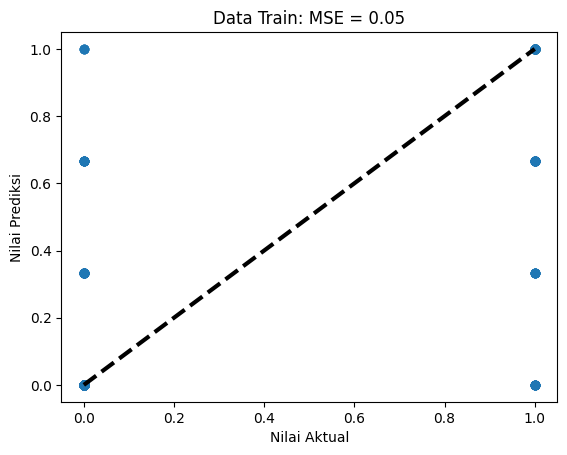

In [44]:
import matplotlib.pyplot as plt

# Plot data train
plt.scatter(y_train, y_pred_train)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=3)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Data Train: MSE = %.2f' % mse_train)
plt.show()

# Plot dataset
plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Data Train: MSE = %.2f' % mse_train)
plt.show()

Kita akan menggunakan matplotlib untuk membuat scatter plot dari nilai aktual versus nilai prediksi untuk data train dan data test. Garis diagonal yang ditampilkan pada grafik menggambarkan situasi ideal di mana nilai aktual dan prediksi sama. Jika model KNN berhasil memprediksi dengan baik, titik akan membentuk pola yang hampil lurus mengikuti garis diagonal. Jika nilai MSE rendah, artinya model memiliki tingkat akurasi yang baik

Hasil evaluasi (nilai akurasi Algoritma KNN) dan Confusion Matriks

In [45]:
y_pred = classifier.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[173  11]
 [ 19  97]]


0.9

In [47]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[173  11]
 [ 19  97]]


0.9

Nilai akurasi algoritma KNN adalah 90%

NAIVE BAYES

In [48]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [49]:
# fit train set pakai Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [50]:
# compute the accuracy of train set
nb.score(X_train, y_train)

0.8208333333333333

In [51]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [52]:
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.8433


Membuat model dengan Neural Network

In [53]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)



# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}
# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Lakukan pencarian grid pada data training
grid_search.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

In [54]:
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

In [55]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'max_iter': 200}


In [56]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,),learning_rate_init=0.1,max_iter=100)

clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100)

In [57]:
y_pred = clf.predict(X_test)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       184
           1       0.83      0.86      0.85       116

    accuracy                           0.88       300
   macro avg       0.87      0.88      0.87       300
weighted avg       0.88      0.88      0.88       300



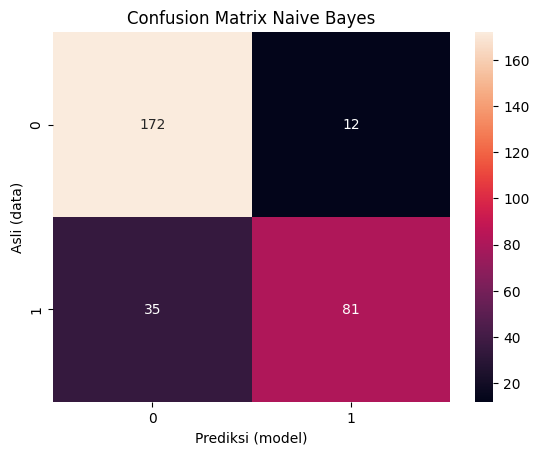

In [59]:
# Visualisasi Confusion Matrix
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_predict['NB'] are your true and predicted labels for Naive Bayes
cm_nb = confusion_matrix(y_test, y_predict['NB'])  # Calculate the confusion matrix

sns.heatmap(cm_nb, annot=True, fmt='d', cmap='rocket')
plt.xlabel('Prediksi (model)')
plt.ylabel('Asli (data)')
plt.title('Confusion Matrix Naive Bayes')
plt.show()

In [60]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.88

Output 0.88 yang dihasilkan dari accuracy_score menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Dalam konteks ini, angka 0.88 berarti bahwa model berhasil memprediksi dengan benar sekitar 88% dari semua sampel pada data uji (y_test) yang telah digunakan. Hasil ini melebihi akurasi yang ditunjukkan dengan menggunakan KNN yaitu 90%. Dengan demikian dalam kasus ini klasifikasi dengan menggunakan KNN lebih akurat daripada menggunakan Naive Bayes.

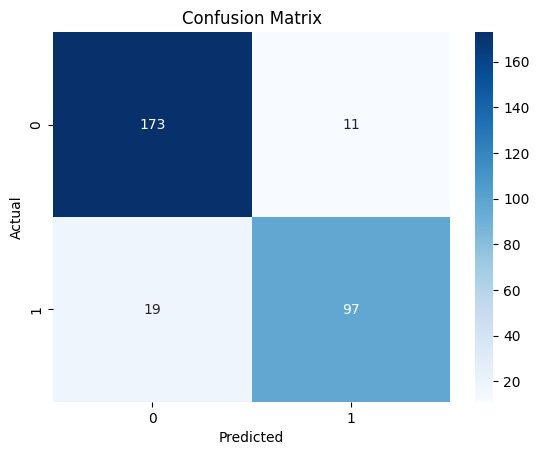

In [64]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()